I've recently been hit by something I would describe as "being bit by the bayesian bug".

Things got started when my friend Anders sent me a text with this timely "math riddle":

> A serological test has 95% probability of returning **positive** for someone who has COVID-19 antibodies and 95% probability of returning **negative** for someone who has no COVID-19 antibodies.
>
> You get tested. The test returns **positive**. What is the probability that you have COVID-19 antibodies?

DISCLAIMER: I have no idea if these numbers are accurate (but you can find more info on serology tests from the CDC [here](https://www.cdc.gov/coronavirus/2019-ncov/lab/serology-testing.html)).

I knew at first sight that this is a classic question in statistics, and that it can be solved by applying [Bayes's theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem). However, I lacked the skill to do it in practice. I decided to learn enough to be able this sort of question in the future. And it started a sort of Bayes' frenzy in my life.

# Solving the Corona testing quizz 

I turned to YouTube to get a footing on what it takes to answer the above question (I also visited Wikipedia, but I didn't find the introductory stuff I was looking for there). And I found what I believe is a beautiful introduction to the subject in [3blue1brown's video about Bayes theorem](https://www.youtube.com/watch?v=HZGCoVF3YvM). 

The video asks this question and then shows how to answer it:

> Steve is very shy and withdrawn, invariably helpful but with little interest in people or in the world of reality. A meek and tidy soul, he has a need for order and structure, and a passion for detail. What is more likely: Steve is a librarian or Steve is a farmer?

I highly recommend the video. It introduces a drawing type which is useful and relevant for thinking about the above questions and has allowed me, as advertised by the video, to memorize Bayes's theorem for later use. 

Here's a screenshot from the video to give you an impression:

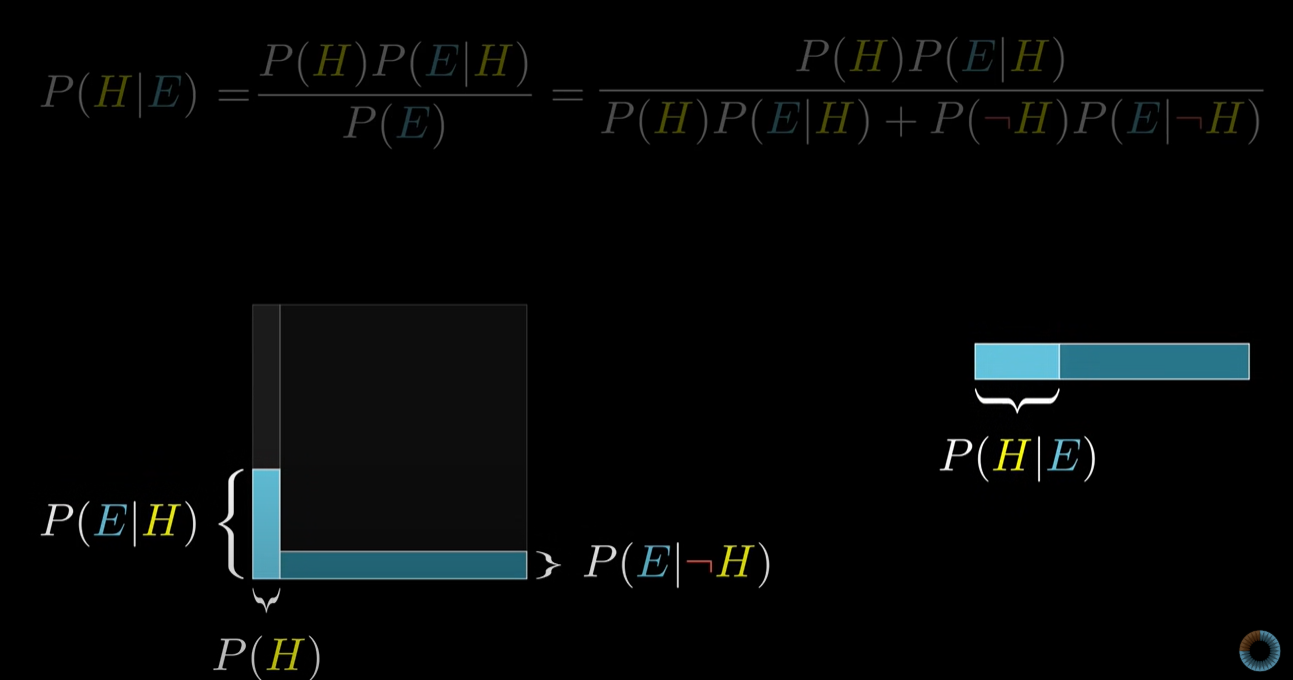

To come back to the intro question, we need to apply Bayes's theorem:

$$
P(H|E) = \frac{P(E|H) P(H)}{P(E)}
$$

In the formula, the hypothesis *H* is "I have COVID-19 antibodies". The Evidence *E* is "My test is positive".
P(E|H) is the likelihood my test is positive when I have COVID-19 antibodies, which is 95%. P(E) is the total probability of having a positive test. P(H) is the prior probability of having COVID-19 antibodies.

The crucial part in applying the formula above lies in the data that is missing from the problem definition, P(H).
P(H) is the general proportion of the population that has had COVID-19. In France, at the time of writing, there had been 160,000 confirmed cases (source: [Our World In Data](https://ourworldindata.org/coronavirus/country/france?country=~FRA)).
This would bring the ratio of cases to total population to:

In [1]:
print(f"{160000 / 67000000 * 100:.2f} %")

0.24 %


However, this is not the true incidence in the population, it is only the confirmed incidence. To get closer to reality (I think...), I multiply this by ten to account for the fact that confirmed cases are less than total cases, getting an order of magnitude of 2.4 %. 

Pluggin this in the formula, I can now compute the answer to the question:

In [2]:
prior = 2.4 / 100.
likelihood = 95 / 100.
total_prob = prior * likelihood + (1 - prior) * 5 / 100.
posterior = prior * likelihood / total_prob

print(f"probability of having COVID-19 antibodies given a positive test: {posterior * 100:.1f}%.")

probability of having COVID-19 antibodies given a positive test: 31.8%.


Surprise, surprise, the chance of having antibodies is only 31.8%.

To get a better intuitive understanding, I put the data in the interactive Bayes's theorem tool (https://www.skobelevs.ie/BayesTheorem/) that was linked to by 3blue1brown (I had to round them up since the tool only accepts integers):

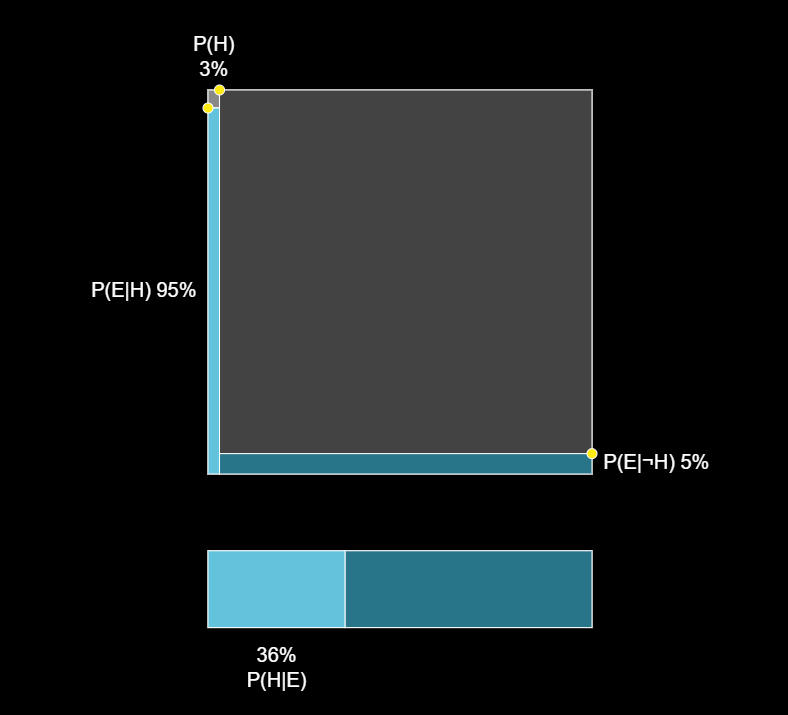

In the above diagram, we have:

> H(ypothesis): I have antibodies
>
>not H: I don't have antibodies
>
>E(vidence): my test is positive
>
>("|" is read as "given")

Admittedly, I expected the probability to be much higher than 31.8%: I wrote to my friend who sent me the riddle I believed it to be 90%! 

But it makes intuitive sense when looking at the drawing: there are two kind of positive tests. The blue ones are the true positives and the green ones are the false positives. And since most people haven't been exposed to COVID-19, there are more false positives. Which in turn means that if you only know about the test (and assuming that you had no other symptoms), it is more likely than not that you don't have antibodies.

Of course, this result *should not be taken too seriously*, since this is not the actual sensivity and specificity of current serological tests. But it illustrates the fact that a test with high perceived reliability is not in itself a guarantee for accuracy (something that apparently two thirds of doctors also fail to recognize according to [this article from Statistics Done Wrong](https://www.statisticsdonewrong.com/p-value.html#the-base-rate-fallacy-in-medical-testing)).

# XKCD 

Going down the path of Bayes's theorem, I have now realized what so many people have before me: you can spot lots of situations in real life where it applies. 

There's even an [obligatory XKCD](https://xkcd.com/2236/) about this:

![xkcd 2236](https://imgs.xkcd.com/comics/is_it_christmas.png)

You might wonder what makes this comic interesting or connected to Bayes's theorem. I'll try to rephrase it. When we see a 99.73% accuracy, we are usually led to believe something works really well. That is not necessarily true and is particularly false in this case. 

Where does the 99.73% accuracy come from? Supposing the service always says no (and this is where the humour is), it will be correct 364 out of 365 days every year. What accuracy would that give?

In [3]:
print(f"{364/365 * 100:.2f}%")

99.73%


Let's say that we are interested in the probability that it is Christmas given that the accuracy of the indication is 99.73%. That also means that it gives incorrect information at a rate of 0.27%. Plugging in these numbers in the interactive calculator, the diagram that represents this situation is (rounded to integers):

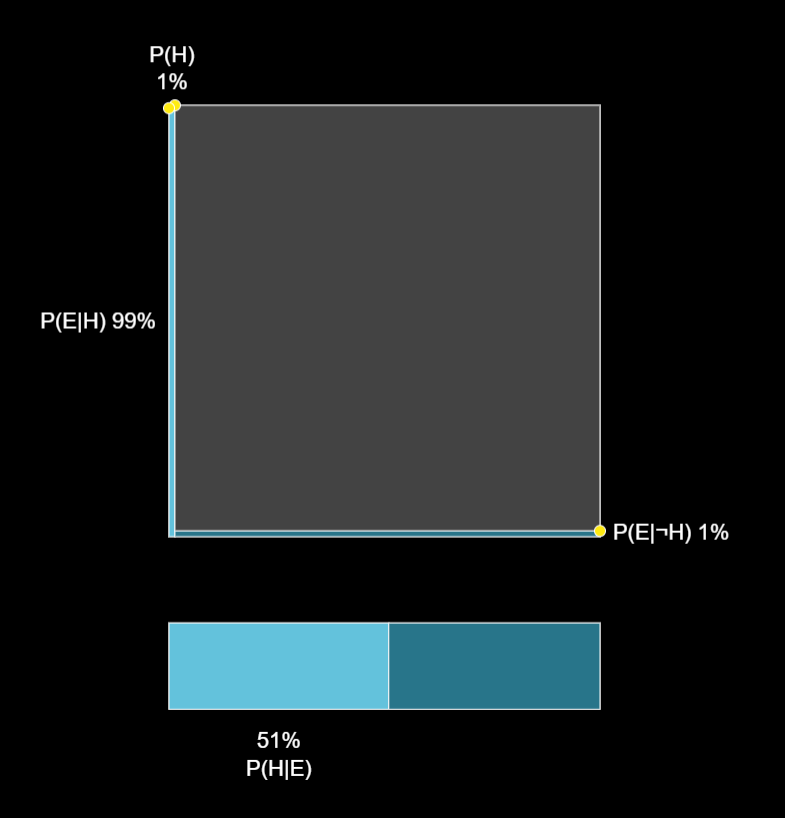

With:

> H(ypothesis): it is Christmas
>
> not H: it is not Christmas
>
> p(correct evidence|H) = 99%
> p(incorrect evidence|not H) = 1%

Surprisingly, even with this high accuracy, there is only a 51% chance that it is really Christmas.

We can conclude that for very rare events, an accuracy as high as 99.73% does not mean it *works*. 

In that case, applying Bayes's theorem tells us that this information is not useful enough to predict it is Christmas (see also the discussion at [explainxkcd](https://www.explainxkcd.com/wiki/index.php/2236)).

# Allen Downey's book *Think Bayes* and the audience problem 

Since I'm now quite interested in the topic, I invested some time in the first chapters of [Think Bayes](https://greenteapress.com/wp/think-bayes/), a *free* book by Allen Downey. It introduces all the necessary tools to solve problems using the Bayesian framework (in Python). The included exercises are well worth studying. To give you a feeling for what the exercices are like, I'll solve one of those from Chapter 4, which made me scratch my head but is quite fun.

## The audience problem 

For lack of a better name, I'll call it the *audience problem*.

> Suppose you are giving a talk in a large lecture hall and you want to estimate the number of people in the audience.  There are too many to count, so you ask how many people were born on May 11 and two people raise their hands.  You ask how many were born on May 23 and 1 person raises their hand.  Finally, you ask how many were born on August 1, and no one raises their hand.
>
>How many people are in the audience?  What is the 90% credible interval for your estimate?  
>
>Hint: Remember the binomial distribution.


Writing this in terms of probabilities, we are looking for maximum value of $P(N|2B\textrm{ and }1B\textrm{ and }0B)$, where 2B means "we know 2 people in the room have a birthday on a particular day" (and so on for 1B and 0B), while $N$ is the size of the room.

Applying Bayes's theorem, this transforms into:

$$
P(N|2B\textrm{ and }1B\textrm{ and }0B) = \frac{ P(2B\textrm{ and }1B\textrm{ and }0B|N) P(N) }{ P(2B\textrm{ and }1B\textrm{ and }0B) }
$$

To answer this, we will break it down in two parts. 

First, what is $P(kB|N)$? 

Once we have that, we will use that to compute the answer to the problem.

## Birthdays and the binomial 

Given a room full of $N$ people, what is the likelihood that there are $k$ people having a birthday on a particular day in the room, which we will write $P(kB|N)$ ? Although related, this is not the [Birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem).

The *hint* points us to an analogy between this problem and *biased* coin flips. For a given date, for each person, there is a 1/365 chance to be born on a chosen date and 364/365 chances to be born on a different date. Of course, this is not completely true. [Wikipedia says this](https://en.m.wikipedia.org/wiki/Birthday#Distribution_through_the_year):

> According to a public database of births, birthdays in the United States are quite evenly distributed for the most part, but there tend to be more births in September and October.

Still, we can now use the binomial distribution to model the likelihood of seeing $k$ people out of a group of $N$ being born on a particular day. So we can answer our first subproblem:

$$
P(kB|N) = \binom {N}{k}\left(\frac{1}{365}\right)^{k}\left(\frac{364}{365}\right)^{N-k}
$$



Let's print out some examples:

In [4]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
plt.style.use('bmh')

def likelihood(simultaneous_birthdays, n_people):
    return binom.pmf(simultaneous_birthdays, n_people, 1/365)

for n_people in [10, 100, 1000, 5000]:
    print(f"probability of having 2 same birthdays in a group of {n_people} people: {likelihood(2, n_people)}")

print()

for n_people in [10, 100, 1000, 5000]:
    print(f"probability of having 3 same birthdays in a group of {n_people} people: {likelihood(3, n_people)}")

probability of having 2 same birthdays in a group of 10 people: 0.0003304417689522596
probability of having 2 same birthdays in a group of 100 people: 0.028395815838883412
probability of having 2 same birthdays in a group of 1000 people: 0.24257828306055526
probability of having 2 same birthdays in a group of 5000 people: 0.00010404383244978144

probability of having 3 same birthdays in a group of 10 people: 2.420818820163081e-06
probability of having 3 same birthdays in a group of 100 people: 0.002548342447079194
probability of having 3 same birthdays in a group of 1000 people: 0.22169700228458852
probability of having 3 same birthdays in a group of 5000 people: 0.0004762006177452762


An interesting thing showing up in these numerical values is that for 2 birthdays occuring on the same date, the probability rises and then goes down again. This can be understood by graphing the probability of seeing $k$ people sharing a birthday for a group of 10000 people:

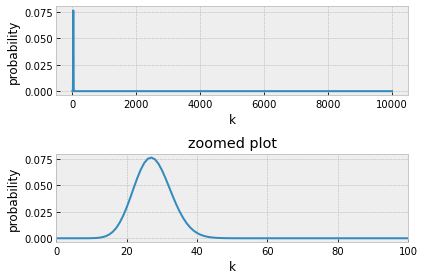

In [5]:
k = np.arange(0, 10001)
probs = likelihood(k, 10000)

fig, (ax1, ax2)= plt.subplots(nrows=2)
ax1.plot(k, probs)
ax2.plot(k, probs)
ax2.set_xlim(0, 100)
for ax in [ax1, ax2]:
    ax.set_xlabel('k')
    ax.set_ylabel('probability')
    
ax2.set_title('zoomed plot')
plt.tight_layout()

It appears that the number of birthdays is most probable for the expected value of $1/365 \times N$. 

Hence, when increasing the number of people in the room from 10 to 5000, we pass this "bump" in the process which leads to an increase and then a decrease in probability.

## Solution to the audience problem 

Now on to the solution of the problem. 
We can further simplify the problem by applying the rule for independant events.
$$
P(N|2B\textrm{ and }1B\textrm{ and }0B) = \frac{ P(2B\textrm{ and }1B\textrm{ and }0B|N) P(N) }{ P(2B\textrm{ and }1B\textrm{ and }0B) } = \frac{ P(2B | N) P(1B|N) P(0B|N) P(N) }{ P(2B) P(1B) P(0B) }
$$

To compute this formula, we will set up a world of all possible room sizes $N$ called `hypos` and then apply the likelihood to each world separately.

In [6]:
from empiricaldist import Pmf

hypos = np.arange(1, 2000) # let's say there are at maximum 2000 people in the room

pmf = Pmf(1, hypos) # each hypothesis/world has the same probability at first (hence the 1)

pmf.normalize() # normalize the probability distribution

1999

We can now write the update function that allows us to process new evidence, of which we have three (2 people born on the same day, 1 on the same day, 0 on the same day). It makes use of the `likelihood` function that we wrote above for the computation of $P(kB|N)$.

In [7]:
def update_prior(pmf, simultaneous_birthdays_observed):
    """Updates the pmf with the posterior likelihood of `simultaneous_birthdays_observed`."""
    l = likelihood(simultaneous_birthdays_observed, pmf.qs) # this is P(kB|N)
    l[pmf.qs < simultaneous_birthdays_observed] = 0
    pmf *= l
    pmf.normalize()

Let's now proceed step by step and see how the successive evidence modifies our belief in the the most likely room size.

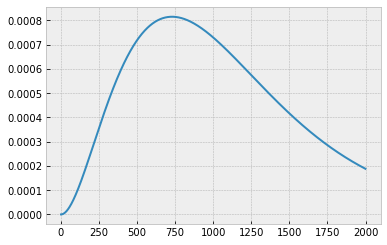

In [8]:
update_prior(pmf, 2) # we now know there's two people having a birthday on a particular day

pmf.plot()

As we expect from our introductory analysis, our first posterior is centered around a room size of 730, which is the most likely room size for two people sharing a birthday on a particular day.

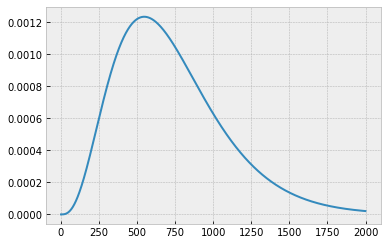

In [9]:
update_prior(pmf, 1) # we now also know there's one person having a birthday on a particular day

pmf.plot()

Taking into account one more information on a single birthday the probability gets shifted towards 365 (expected room size if you only know there's one person having a birthday on a particular day), while still retaining some shape of the previous estimate.

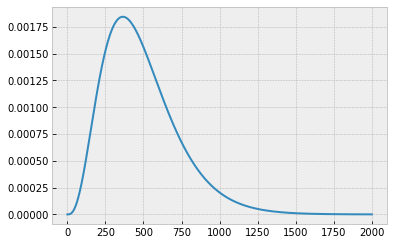

In [10]:
update_prior(pmf, 0) # we now also know there's zero people having a birthday on a particular day

pmf.plot()

And finally we shift further to the left (towards the expected value of 0 people when 0 zero people have a birthday on a particular day).

This yields the solution to our problem. What is the most probable room size?

In [11]:
pmf.max_prob()

365

And what is the 95% credible region?

In [12]:
pmf.credible_interval(0.95)

array([ 133., 1065.])

Let's put all this together to draw a complete graph:

first update [ 218. 1880.]
second update [ 199. 1551.]
third update [ 133. 1065.]


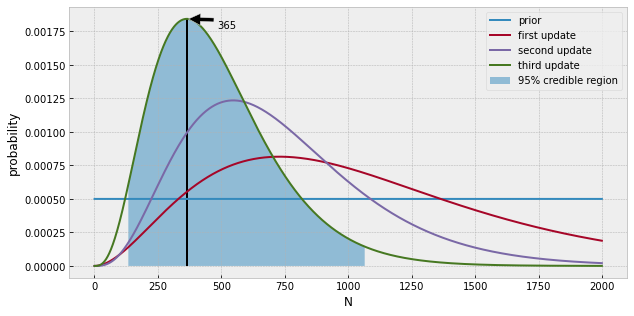

In [13]:
hypos = np.arange(1, 2000)
pmf = Pmf(1, hypos)
pmf.normalize()

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(pmf.qs, pmf.ps, label='prior')

update_prior(pmf, 2)
print("first update", pmf.credible_interval(.95))

ax.plot(pmf.qs, pmf.ps, label='first update')

update_prior(pmf, 1)
print("second update", pmf.credible_interval(.95))

ax.plot(pmf.qs, pmf.ps, label='second update')

update_prior(pmf, 0)
print("third update", pmf.credible_interval(.95))

ax.plot(pmf.qs, pmf.ps, label='third update')



ax.vlines(pmf.max_prob(), 0, pmf[pmf.max_prob()])

mini, maxi = pmf.credible_interval(.95)
sel = (pmf.qs > mini) & (pmf.qs <= maxi)
ax.fill_between(pmf.qs[sel], pmf.ps[sel], alpha=0.5, label='95% credible region')
ax.annotate(xy=(pmf.max_prob(), pmf.ps[pmf.max_prob()]), s=f"{pmf.max_prob()}",
            xytext=(0.3, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.set_xlabel('N')
ax.set_ylabel('probability')
ax.legend();

As you can see in the above plot having two birthdays observed shapes the posterior to center on 730 people, then observing one birthday moves it towards 365 and finally seeing zero born on another date shifts it towards 0. All things done, we end up with a most likely number of 365 people in the room.

## Analytical solution 

As my friend Anders has pointed out, there also exists an analytical solution to this problem. It works as follows: suppose the number of people in the room is N. What is the probability of observing 2, 1 and 0 conjoint birthdays? Since the events are independent, it is a multiplication of their likelihoods. As will notice, this is quite close to the expression derived using Bayes's theorem, but without the prior and without the normalizing constant in the denominator.

$$
L = P(2B | N) P(1B|N) P(0B|N)
$$

Let's compute this likelihood $L$ with `sympy`.

In [14]:
import sympy as sp

n = sp.Symbol('n', integer=True, positive=True)
p = sp.Symbol('p', positive=True)

def likelihood_sympy(simultaneous_birthdays, n_people, p):
    return sp.binomial(n_people, simultaneous_birthdays) * p ** simultaneous_birthdays * (1 - p) ** (n_people - simultaneous_birthdays) 

l = likelihood_sympy(2, n, p) * likelihood_sympy(1, n, p) * likelihood_sympy(0, n, p) 

l = sp.simplify(l)

l

n**2*p**3*(1 - p)**(3*n - 3)*(n - 1)/2

(note: I have kept the probability of having a birthday on a particular day written as $p$ for now)

Once we have the likelihood, we want to maximize it. To do that, a necessary condition is that the derivative is zero. We can compute the derivative and solve the equation that sets it to 0 using the following code:

In [15]:
sols = sp.solve(sp.Eq(l.diff(n), 0))

sols[0][n]

(-sqrt(9*log(1 - p)**2 + 6*log(1 - p) + 9)/6 + log(1 - p)/2 - 1/2)/log(1 - p)

Finally, we can plug in the right value of $p$ and compute the analytical answer to the question of "what is the most likely number of people in the room?".

In [16]:
sols[0][n].subs({p:1/365})

364.833714930100

This is very close to our previous best estimate!

We can plot this expression to see how close the numerical results are (using an appropriate normalization). 

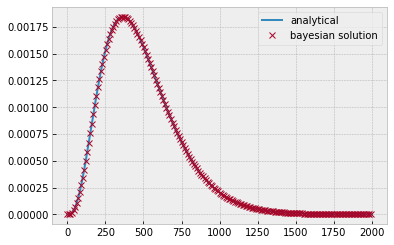

In [17]:
vals = sp.lambdify(n, l.subs({p:1/365}))(hypos) 


fig, ax = plt.subplots()
ax.plot(hypos, vals / vals.max() * pmf.max(), label='analytical')
ax.plot(pmf.qs[::10], pmf.ps[::10], 'x', label='bayesian solution')
ax.legend();

Indeed things seem to be very close. Let's see how close by computing the difference between the two curves.

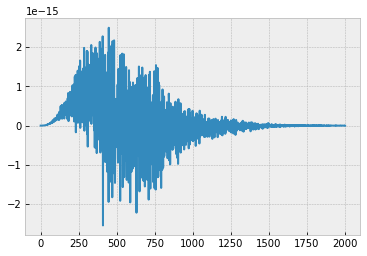

In [18]:
delta = pmf.ps - vals / vals.max() * pmf.max()

fig, ax = plt.subplots()
ax.plot(pmf.qs, delta);

This is very small. 

So it seems that the two ways of solving the problem are very similar. However, there are differences. In particular, in the first method, we set the probability of seeing rooms larger than 2000 people to zero. It turns out that this doesn't seem to have an effect compared to the analytical solution.

The analytical solution gives the impression that things are continuous in the number of people in the room (indeed, could it be that 364.83 people fit in a room?), whereas the first method restricts itself to a discrete setting (more appropriate in this case).

Also, the analytical method didn't mention a prior. Is that a good or a bad thing? Well, it turns out that we implicitly used a prior in the analytical method, even though we didn't notice it. So I would argue it is a bad thing. 

# Conclusion

I hope you've like this little introduction to Bayesian statistics in times of the Coronavirus. If you're interested in this topic, I suggest you read Allen Downey's book, *Think Bayes* or follow him on Twitter.

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Tuesday is Bayes Day! And that means it&#39;s time for a new chapter from the in-progress second edition of Think Bayes: <a href="https://t.co/hHX6Ze3jgK">https://t.co/hHX6Ze3jgK</a><br><br>I think the exercises in this chapter are particularly good. I&#39;ll post solutions later this week.</p>&mdash; Allen Downey (@AllenDowney) <a href="https://twitter.com/AllenDowney/status/1272897398206091265?ref_src=twsrc%5Etfw">June 16, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

**Acknowledgement** I would like to thank Allen Downey for his helpful comments on this post. All errors are, of course, mine.

*This post was entirely written using the Jupyter Notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20200624_BayesianInCoronaTimes.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20200624_BayesianInCoronaTimes.ipynb).*